# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ò–º–ø–æ—Ä—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
!pip install pmdarima
!pip install numpy==1.26.0
!pip install --upgrade tensorflow


import pickle
import warnings
import requests
import statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from io import BytesIO
from datetime import datetime
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import acf, adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


warnings.filterwarnings("ignore")
%matplotlib inline

–í—ã–±–µ—Ä–∏—Ç–µ —Å–ø–æ—Å–æ–± –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
url = "https://github.com/samoletpanfilov/reinforcement_task/raw/refs/heads/master/data/train.xlsx"  # –°—Å—ã–ª–∫–∞ –¥–æ–ª–∂–Ω–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç—å raw
response = requests.get(url)
df_ts = pd.read_excel(BytesIO(response.content), engine='openpyxl')

In [ ]:
# df_ts = pd.read_excel('/content/drive/MyDrive/int/train.xlsx')

# –ê–Ω–∞–ª–∏–∑ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

### –ø—Ä–æ—Å–º–æ—Ç—Ä —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

In [ ]:
df_ts.head(15)

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
0  2015-01-05             32900
1  2015-01-12             32500
2  2015-01-19             32000
3  2015-01-26             30700
4  2015-02-02             30300
5  2015-02-09             30300
6  2015-02-16             30100
7  2015-02-23             29400
8  2015-03-02             29200
9  2015-03-09             29000
10 2015-03-16             28700
11 2015-03-23             27800
12 2015-03-30             27200
13 2015-04-06             26600
14 2015-04-13             25700

In [ ]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ NaN
df_ts['dt'].isna().sum()

0

In [ ]:
df_ts.describe()

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
std                    NaN      13407.979668

In [ ]:
df_ts.shape

(400, 2)

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

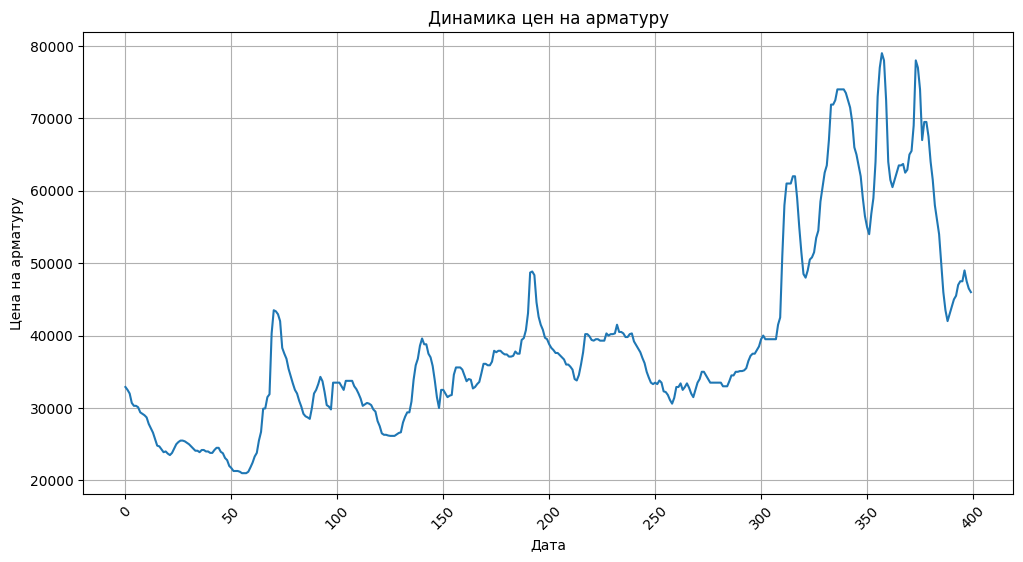

In [ ]:
# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(12, 6))
plt.plot(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"], marker='', linestyle='-')

# –ù–∞—Å—Ç—Ä–æ–∏–º –æ—Å–∏ –∏ –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.title("–î–∏–Ω–∞–º–∏–∫–∞ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.grid(True)

# –£–ª—É—á—à–∏–º —á–∏—Ç–∞–µ–º–æ—Å—Ç—å –º–µ—Ç–æ–∫ –¥–∞—Ç
plt.xticks(rotation=45)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.show()

**–í–æ–ø—Ä–æ—Å—ã –∫ –≥—Ä–∞—Ñ–∏–∫—É:**

 1.–ï—Å—Ç—å –ª–∏ —Ç—Ä–µ–Ω–¥?

 2.–ï—Å—Ç—å –ª–∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å?

 3.–ù–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω—ã–π —à—É–º?



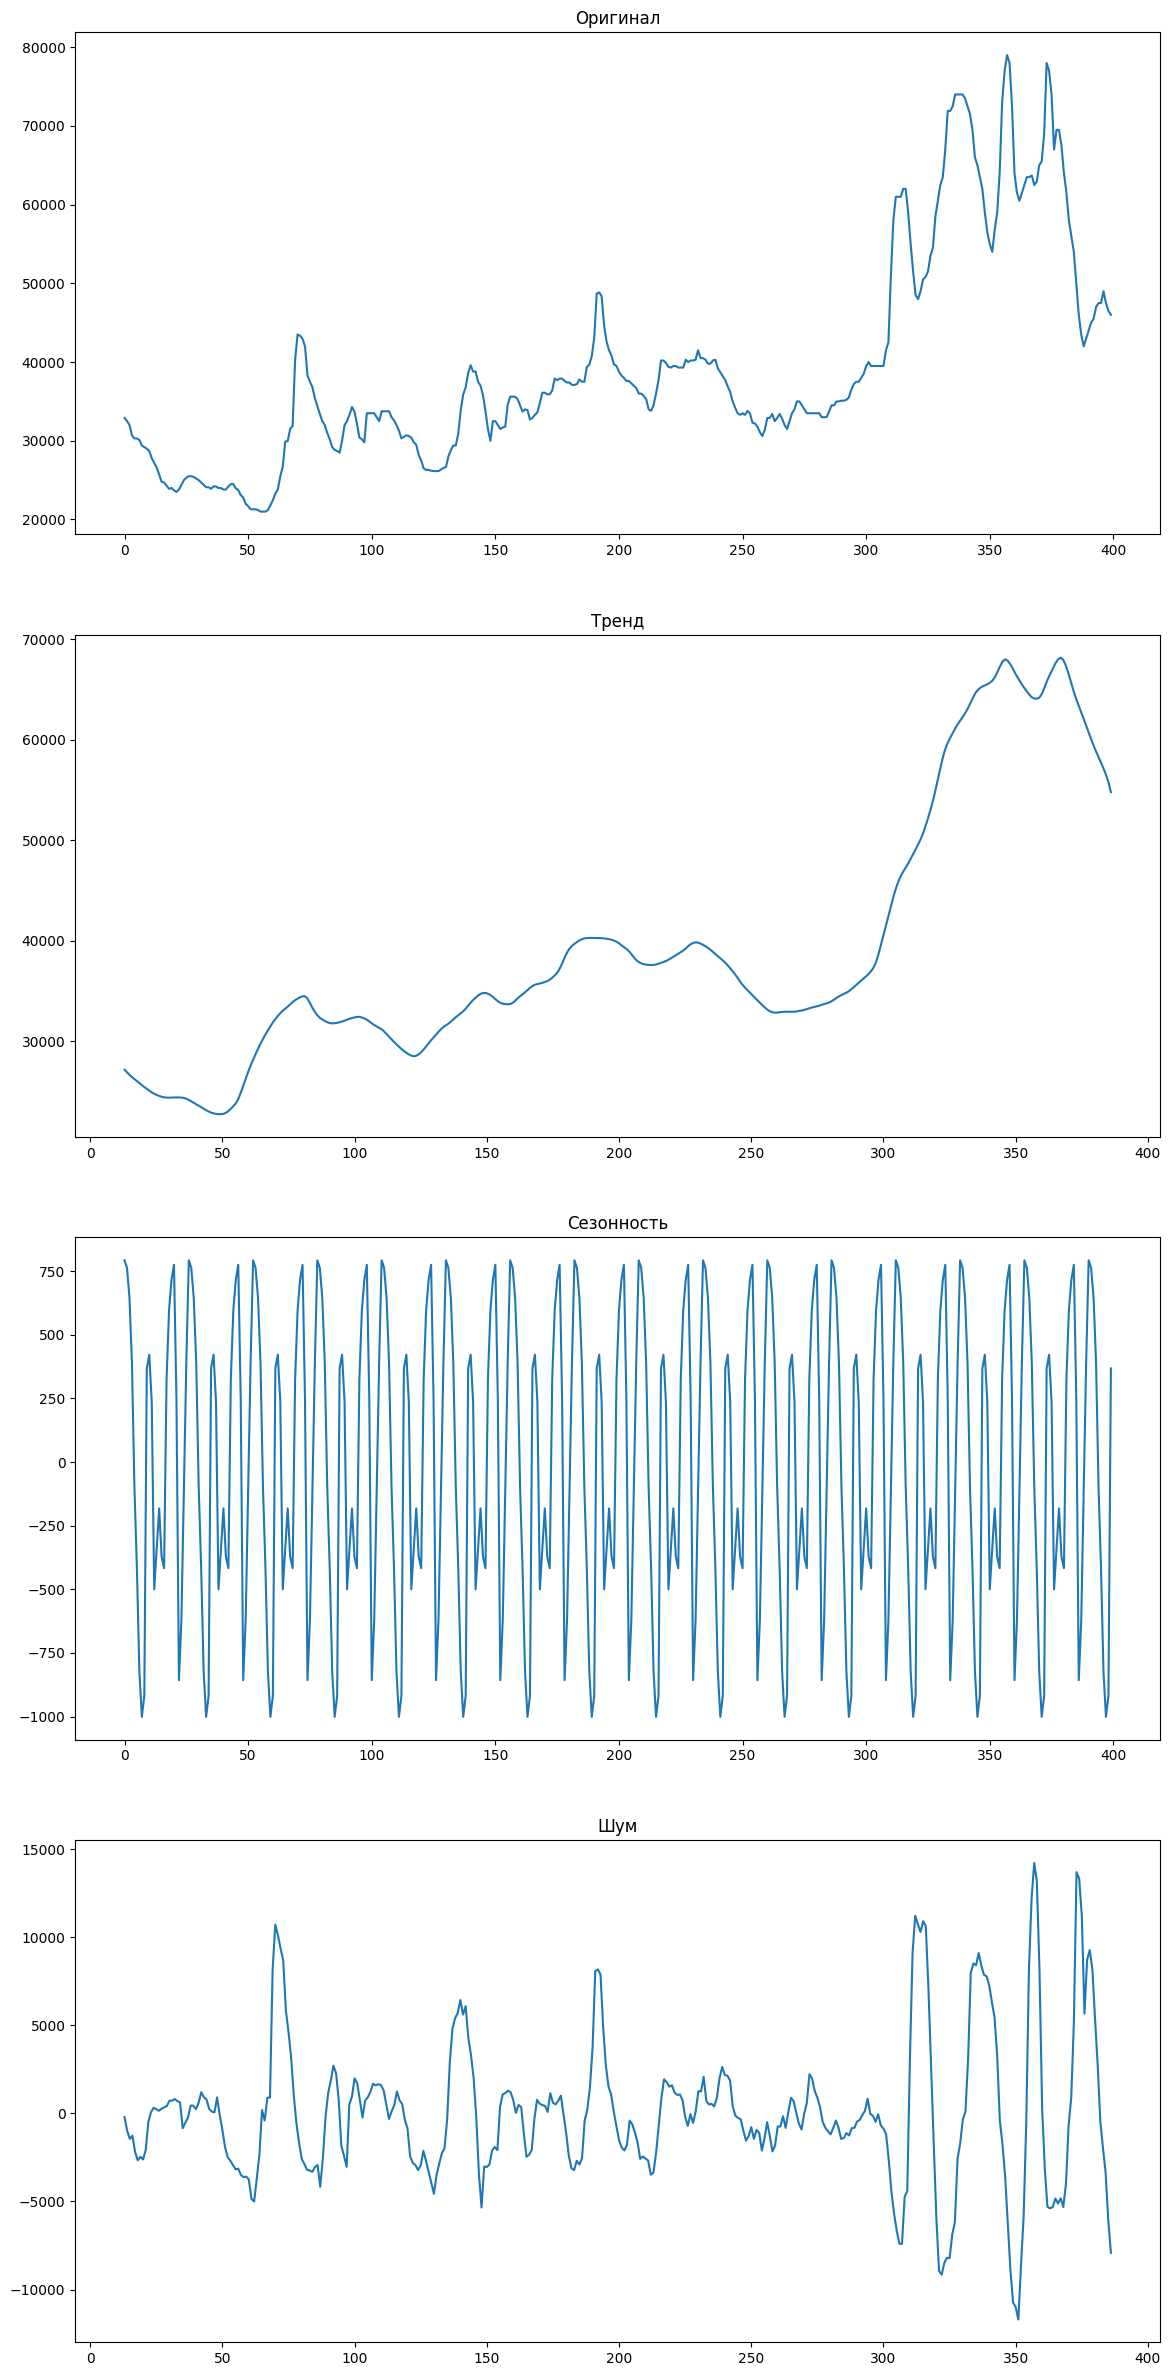

In [ ]:
# –†–∞–∑–ª–æ–∂–∏–º —Ä—è–¥ –Ω–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –∏ –ø—Ä–æ–≤–µ—Ä–∏–º –æ—Ç–≤–µ—Ç—ã –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 30))
decompose = seasonal_decompose(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'],period = 26)

ax[0].set_title('–û—Ä–∏–≥–∏–Ω–∞–ª')
ax[1].set_title('–¢—Ä–µ–Ω–¥')
ax[2].set_title('–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å')
ax[3].set_title('–®—É–º')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

–î–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞


üîπ –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Ä—è–¥  


–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ç—Ä–µ–Ω–¥, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏ —à—É–º.


 üìà –¢—Ä–µ–Ω–¥

   
–û–±—â–∏–π –≤–æ—Å—Ö–æ–¥—è—â–∏–π —Ç—Ä–µ–Ω–¥, –æ—Ç—Ä–∞–∂–∞—é—â–∏–π –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã–π —Ä–æ—Å—Ç.


üîÑ –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å


–í—ã—Ä–∞–∂–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏–µ –∫–æ–ª–µ–±–∞–Ω–∏—è, —Å–æ—Ö—Ä–∞–Ω—è—é—â–∏–µ—Å—è –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ–≥–æ —Ä—è–¥–∞.


 üîÄ –®—É–º  

–£–º–µ—Ä–µ–Ω–Ω—ã–π, –Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –±–ª–∏–∂–µ –∫ –∫–æ–Ω—Ü—É —Ä—è–¥–∞, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –∞–Ω–æ–º–∞–ª–∏–∏ –∏–ª–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏–µ –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏.


In [ ]:
# # –†–∞–∑–ª–æ–∂–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ —Å —ç–∫—Å—Ç—Ä–∞–ø–æ–ª—è—Ü–∏–µ–π —Ç—Ä–µ–Ω–¥–∞
# decompose = seasonal_decompose(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'], period=52, extrapolate_trend='freq')

# # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
# fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 30))

# ax[0].set_title('–û—Ä–∏–≥–∏–Ω–∞–ª')
# ax[1].set_title('–¢—Ä–µ–Ω–¥')
# ax[2].set_title('–°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å')
# ax[3].set_title('–®—É–º')

# decompose.observed.plot(ax=ax[0], legend=False)
# decompose.trend.plot(ax=ax[1], legend=False)
# decompose.seasonal.plot(ax=ax[2], legend=False)
# decompose.resid.plot(ax=ax[3], legend=False)

# plt.tight_layout()
# plt.show()

In [ ]:
df_ts.head()

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300

### –†–∞–±–æ—Ç–∞ —Å –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π

In [ ]:
# –ü–æ–ª—É—á–∏–ª '—Å—ã—Ä—ã–µ' –∑–Ω–∞—á–µ–Ω–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
acf(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"] ,nlags = 100, fft = False)

array([1.        , 0.99138242, 0.97367714, 0.95122039, 0.92740427,
       0.90357365, 0.88126621, 0.8606089 , 0.84235253, 0.82671727,
       0.81349611, 0.8020525 , 0.7925797 , 0.78508849, 0.78019657,
       0.77692922, 0.77376814, 0.76901294, 0.76227632, 0.75319077,
       0.74261145, 0.7309889 , 0.71862345, 0.7046383 , 0.68939965,
       0.67325908, 0.65612584, 0.63820561, 0.62109396, 0.60459259,
       0.58872289, 0.57435372, 0.56120831, 0.54900152, 0.5377084 ,
       0.5271632 , 0.51674918, 0.5068141 , 0.49691253, 0.48636205,
       0.47460061, 0.4600824 , 0.44257206, 0.42285538, 0.40223733,
       0.38033844, 0.35769402, 0.33517203, 0.31316745, 0.29306128,
       0.27522925, 0.2595102 , 0.24447201, 0.23086215, 0.21896621,
       0.20859445, 0.1993889 , 0.19088593, 0.18300826, 0.1757314 ,
       0.16880023, 0.16166525, 0.15350675, 0.14370082, 0.13267574,
       0.12198755, 0.11231837, 0.10288107, 0.0929827 , 0.08286002,
       0.07336018, 0.06476539, 0.05709237, 0.05068118, 0.04473

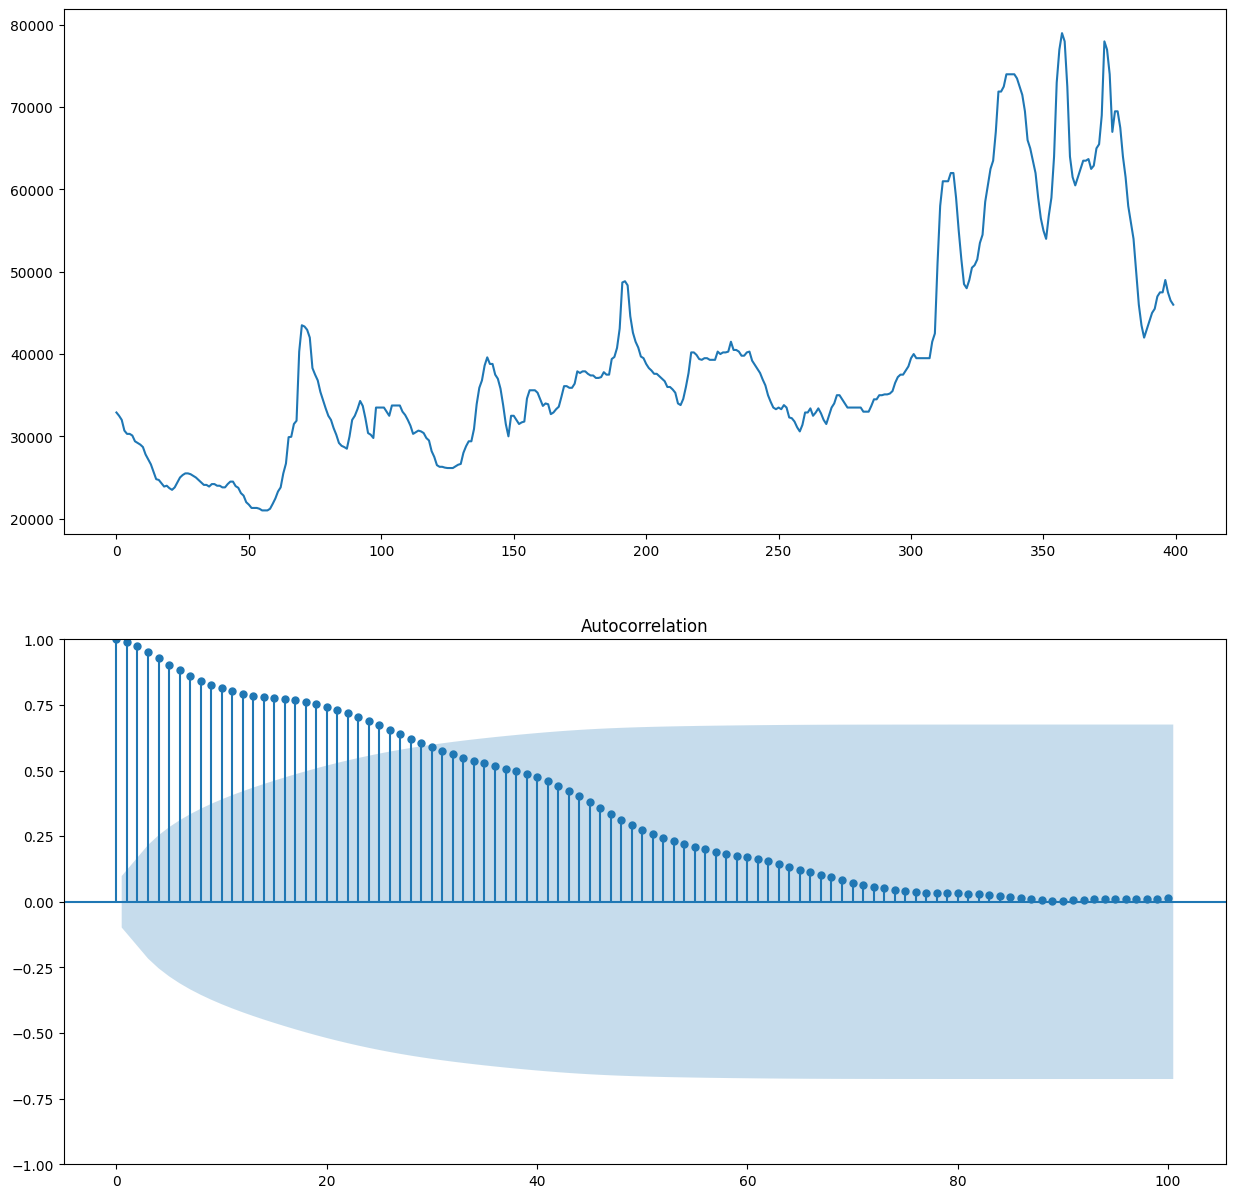

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].plot(ax=ax[0])
plot_acf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'], lags=100, ax=ax[1]);

In [ ]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Ä—è–¥–∞
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'])

ADF Statistic: -1.9258699893713456
p-value: 0.31999061025699155
Critical Values: {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}
–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)


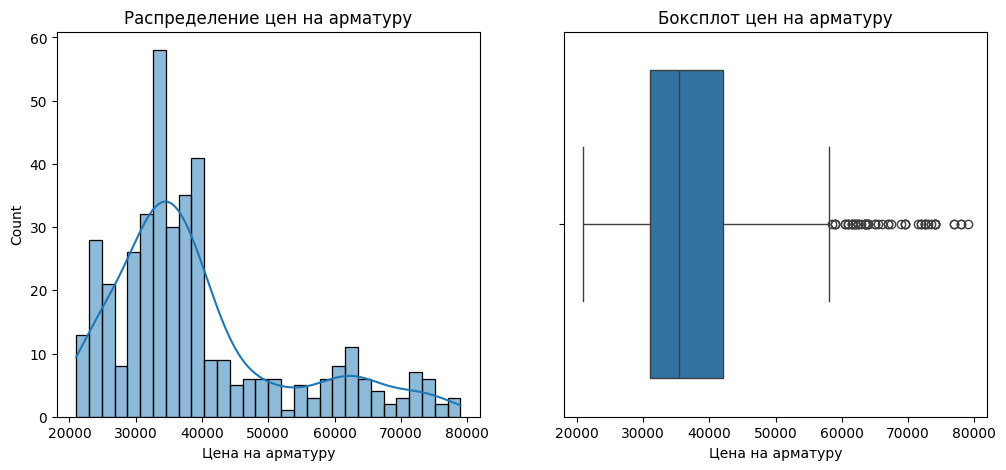

In [ ]:
plt.figure(figsize=(12, 5))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
plt.subplot(1, 2, 1)
sns.histplot(df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"], bins=30, kde=True)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")

# –ë–æ–∫—Å–ø–ª–æ—Ç
plt.subplot(1, 2, 2)
sns.boxplot(x=df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"])
plt.title("–ë–æ–∫—Å–ø–ª–æ—Ç —Ü–µ–Ω –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")

plt.show()

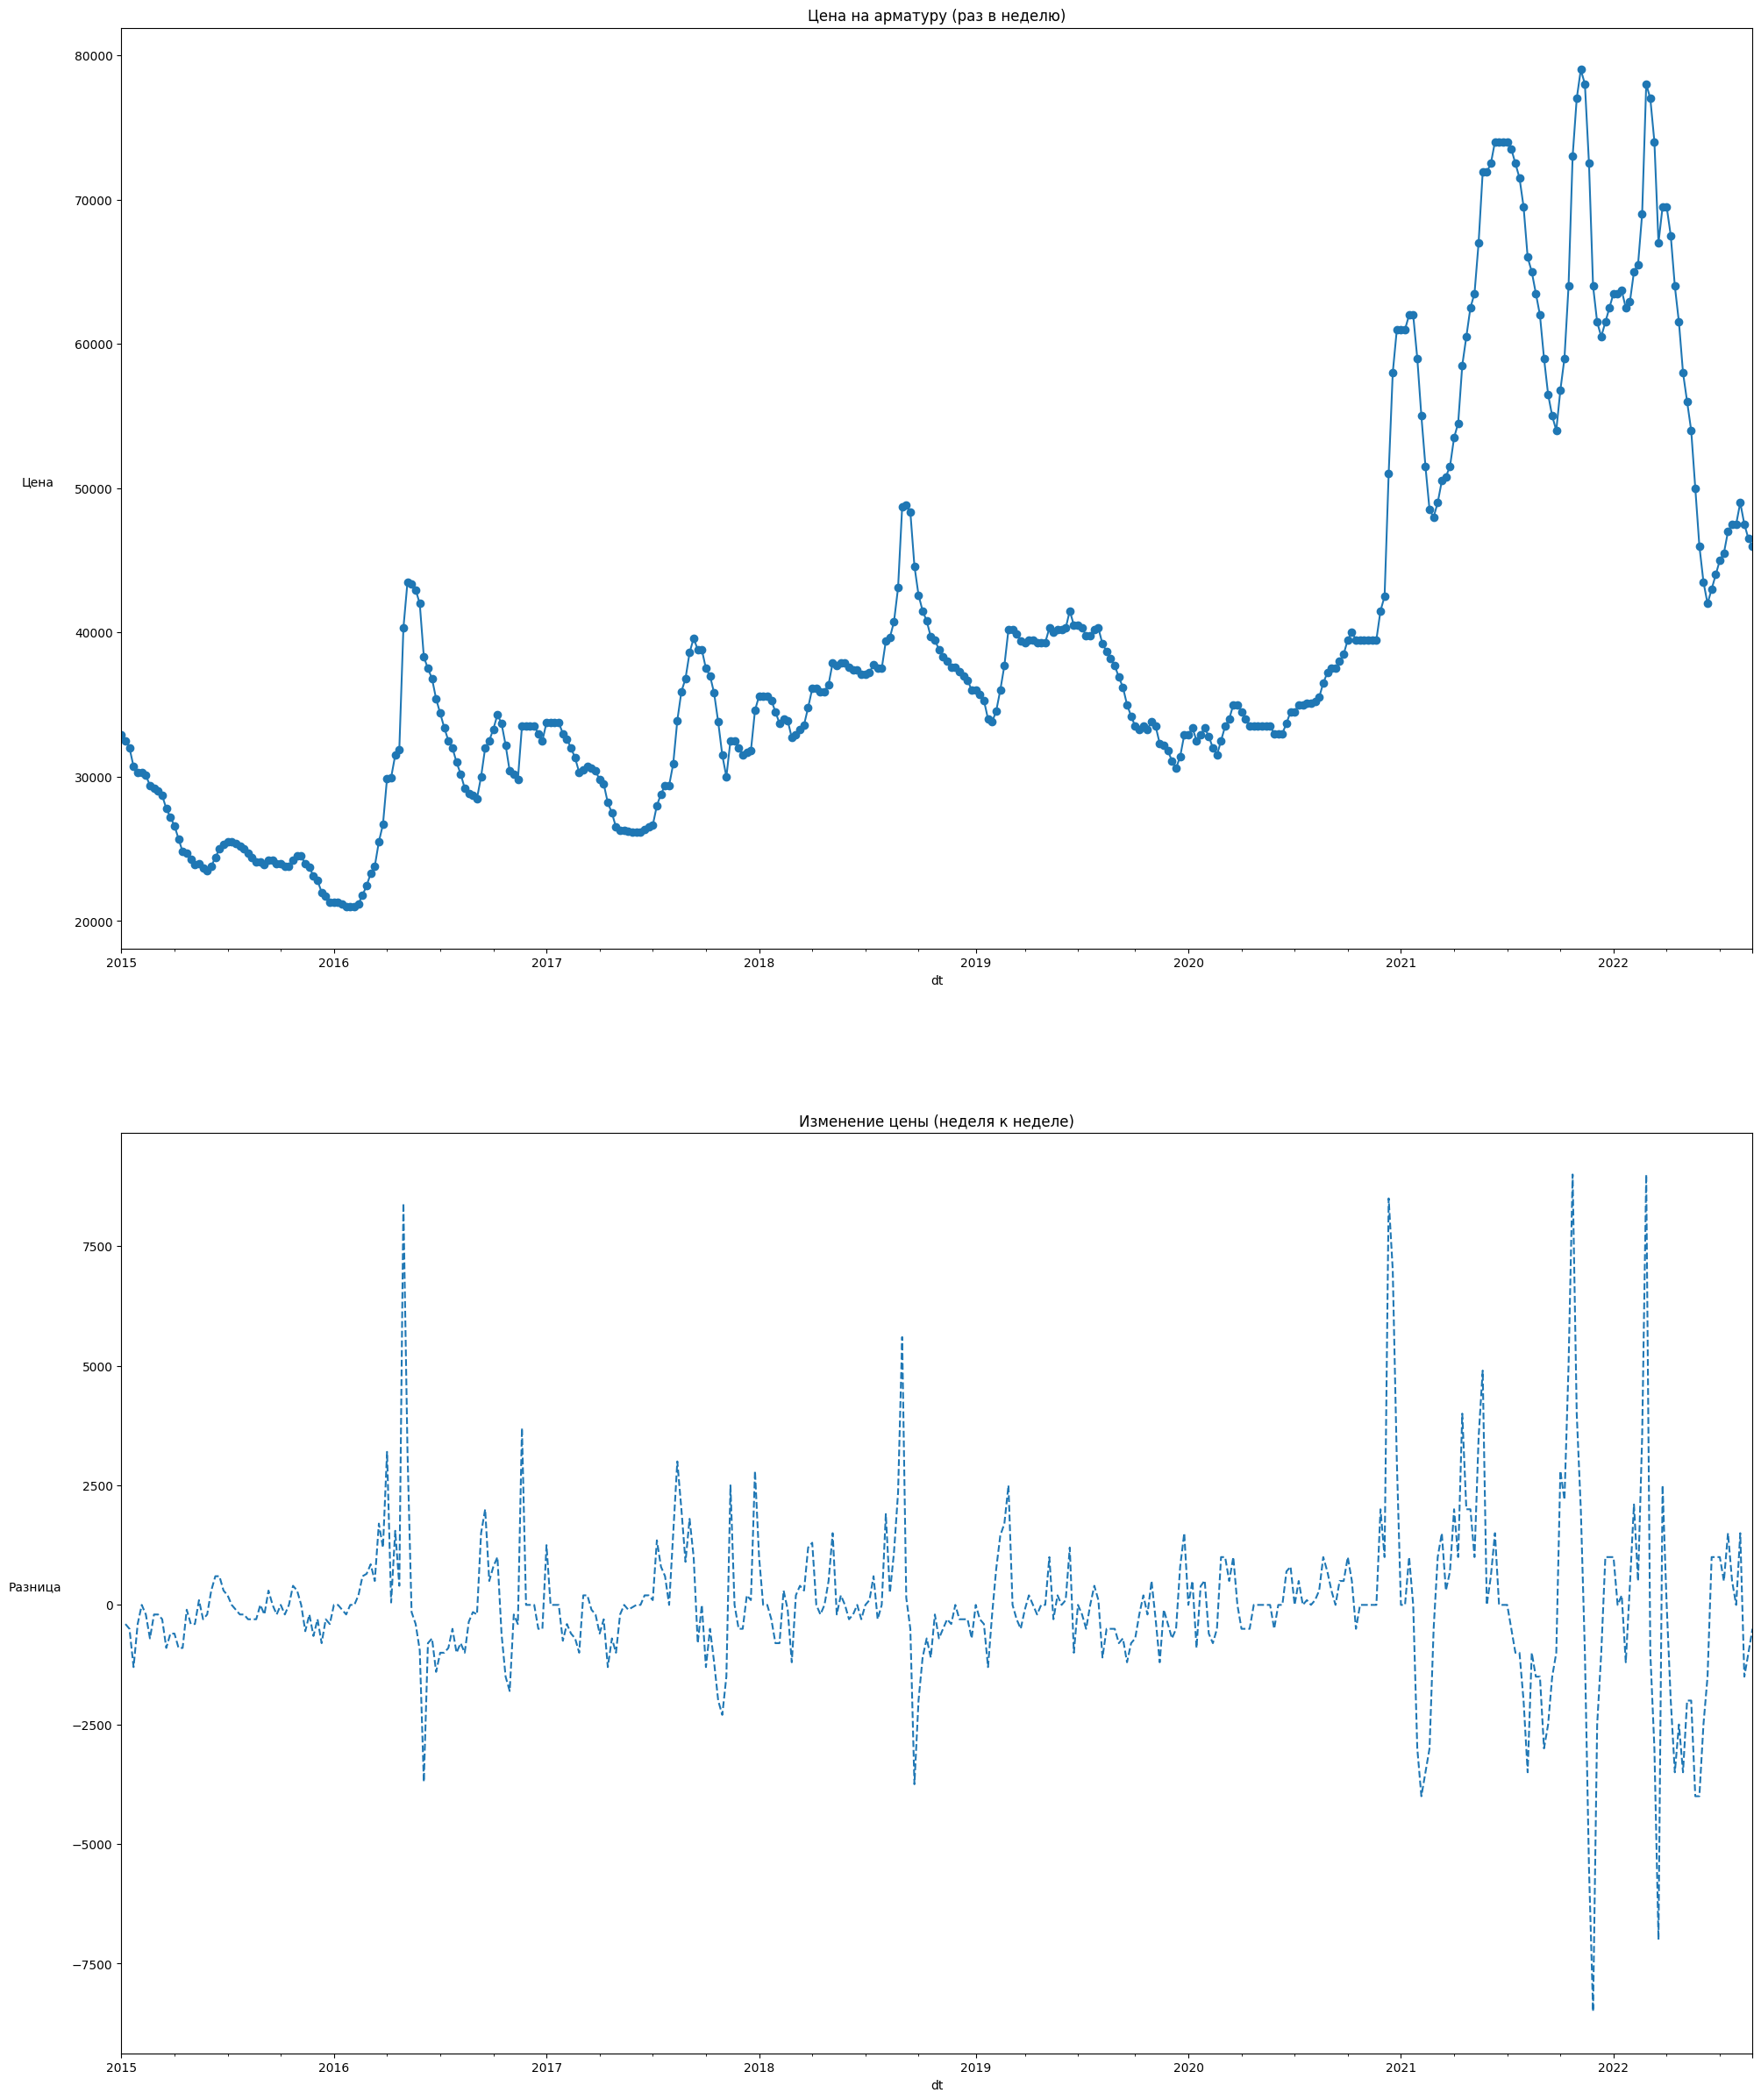

In [ ]:
df_ts['–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è'] = df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].diff(1)  # –†–∞–∑–Ω–∏—Ü–∞ —Å –ø—Ä–æ—à–ª–æ–π –Ω–µ–¥–µ–ª–µ–π

plt.figure(figsize=(24, 30))

ax1 = plt.subplot(211)
ax1.set_title('–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Ä–∞–∑ –≤ –Ω–µ–¥–µ–ª—é)')
ax1.set_ylabel('–¶–µ–Ω–∞', rotation=0, labelpad=30)
df_ts.set_index('dt')['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].plot(ax=ax1, marker='o')

ax2 = plt.subplot(212)
ax2.set_title('–ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–µ–Ω—ã (–Ω–µ–¥–µ–ª—è –∫ –Ω–µ–¥–µ–ª–µ)')
ax2.set_ylabel('–†–∞–∑–Ω–∏—Ü–∞', rotation=0, labelpad=30)
df_ts.set_index('dt')['–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è'].plot(ax=ax2, marker='', linestyle='dashed')

plt.show()

In [ ]:
df_ts.replace(np.nan, 0, inplace=True)

In [ ]:
df_ts.head(10)

dt  –¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É  –¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è
0 2015-01-05             32900                  0.0
1 2015-01-12             32500               -400.0
2 2015-01-19             32000               -500.0
3 2015-01-26             30700              -1300.0
4 2015-02-02             30300               -400.0
5 2015-02-09             30300                  0.0
6 2015-02-16             30100               -200.0
7 2015-02-23             29400               -700.0
8 2015-03-02             29200               -200.0
9 2015-03-09             29000               -200.0

In [ ]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å diff —Ä—è–¥–∞
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è'])

ADF Statistic: -7.711973437154185
p-value: 1.2568518586885597e-11
Critical Values: {'1%': -3.447360865754795, '5%': -2.8690374364690445, '10%': -2.5707639493486636}
–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)


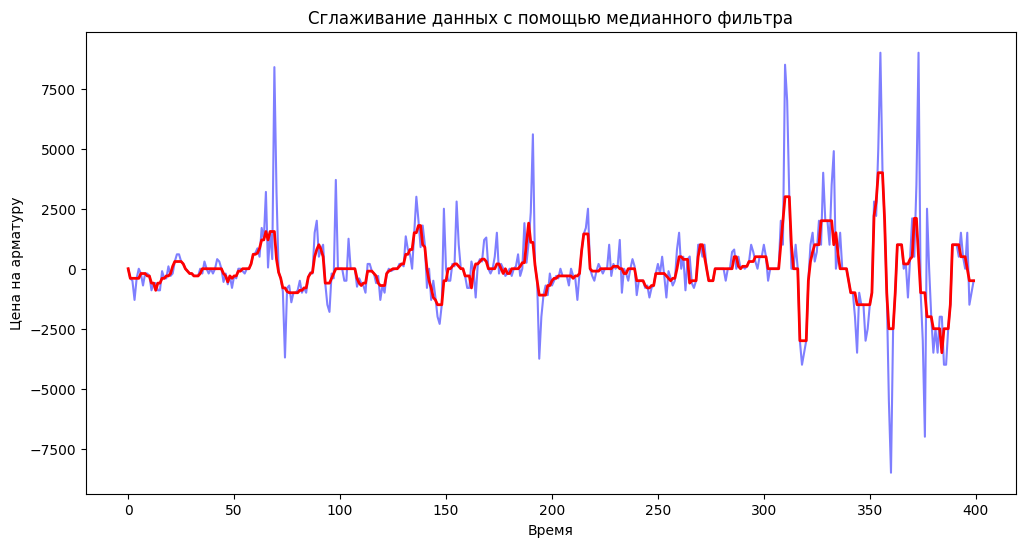

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞
df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"] = medfilt(df_ts["–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è"], kernel_size=5)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 6))

# –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
plt.plot(df_ts.index, df_ts["–¶–µ–Ω–∞_—Ä–∞–∑–Ω–∏—Ü–∞_–Ω–µ–¥–µ–ª—è"], label="–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color='blue', alpha=0.5)

# –°–≥–ª–∞–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
plt.plot(df_ts.index, df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"], label="–°–≥–ª–∞–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color='red', linewidth=2)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–∞
plt.title("–°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞")
plt.xlabel("–í—Ä–µ–º—è")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.show()

In [ ]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å diff —Ä—è–¥–∞ –ø–æ—Å–ª–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'])

ADF Statistic: -7.237213964014841
p-value: 1.9255395178881053e-10
Critical Values: {'1%': -3.44714244478345, '5%': -2.8689414326247995, '10%': -2.5707127699396084}
–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)


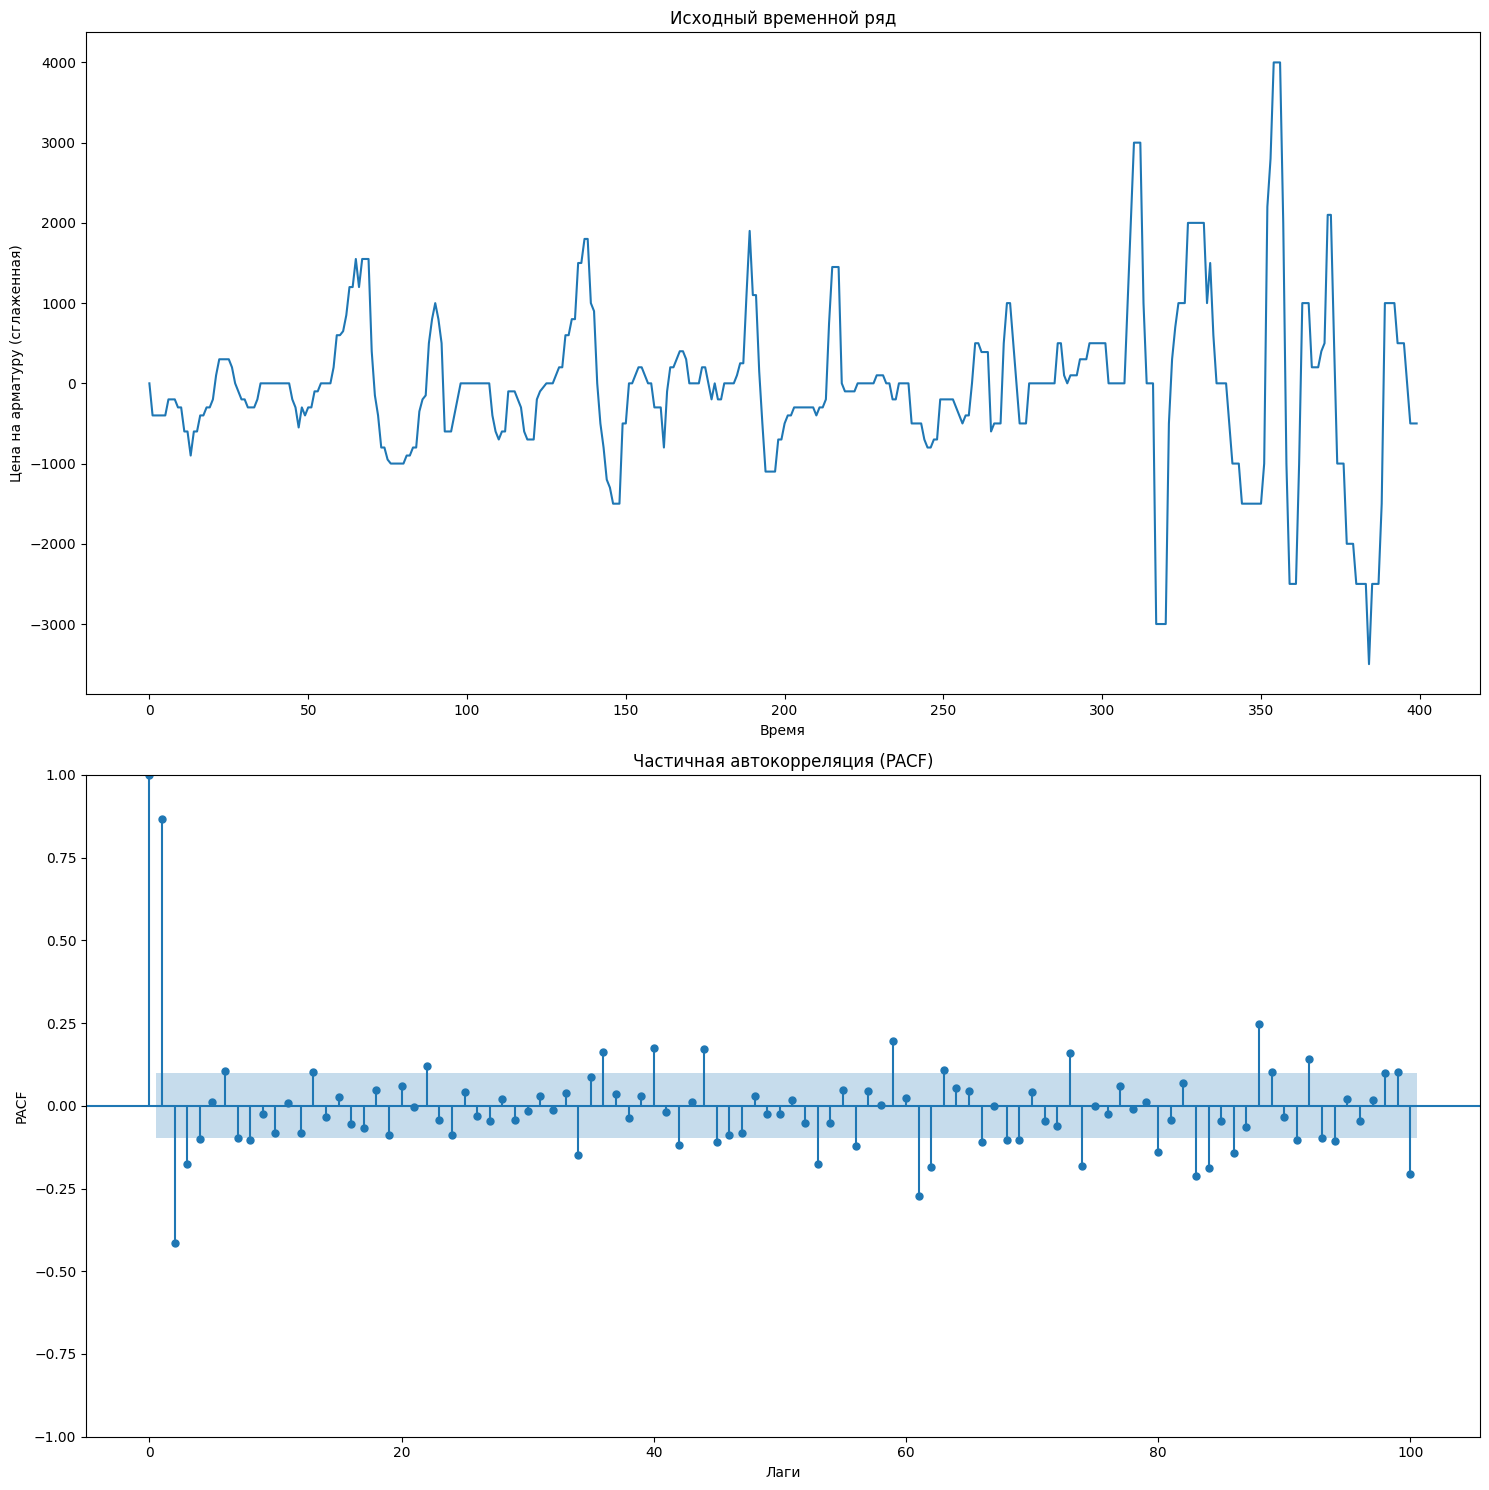

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# –°–æ–∑–¥–∞–µ–º –≥—Ä–∞—Ñ–∏–∫ —Å –¥–≤—É–º—è –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫–∞–º–∏
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# –ü–µ—Ä–≤—ã–π –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫: –∏—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥
df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'].plot(ax=ax[0])
ax[0].set_title('–ò—Å—Ö–æ–¥–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥')
ax[0].set_xlabel('–í—Ä–µ–º—è')
ax[0].set_ylabel('–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)')

# –í—Ç–æ—Ä–æ–π –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫: PACF (—á–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)
plot_pacf(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)'], lags=100, ax=ax[1], method='ols')
ax[1].set_title('–ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (PACF)')
ax[1].set_xlabel('–õ–∞–≥–∏')
ax[1].set_ylabel('PACF')

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.tight_layout()
plt.show()

# –ú–æ–¥–µ–ª–∏

### –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): 16952.11
–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 391666297.00
–ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE): 19790.56
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R¬≤): -2.7375
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç (–Ω–∞–∫–ª–æ–Ω –ª–∏–Ω–∏–∏): 51.9735
–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (–ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ —Å –æ—Å—å—é Y): 25529.88


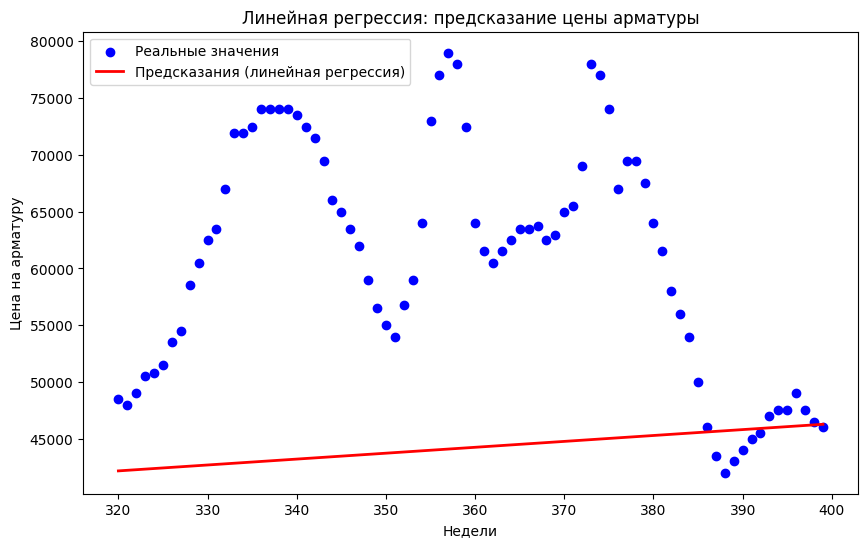

In [ ]:

# 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df_ts["weeks"] = (df_ts["dt"] - df_ts["dt"].min()).dt.days // 7  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞—Ç—É –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π

# 3. –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (X) –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (y)
X = df_ts[["weeks"]]  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–¥–µ–ª—å —Å –ø–µ—Ä–≤–æ–π –¥–∞—Ç—ã
y = df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É"]  # –¶–µ–Ω—ã –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É

# –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, X –∏ y —É–∂–µ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏
split_index = int(len(X) * 0.8)

X_train_lr, X_test_lr = X[:split_index], X[split_index:]
y_train_lr, y_test_lr = y[:split_index], y[split_index:]

# 5. –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
model = LinearRegression()
model.fit(X_train_lr, y_train_lr)

# 6. –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
y_pred_lr = model.predict(X_test_lr)

# 7. –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
mae = mean_absolute_error(y_test_lr, y_pred_lr)
mse = mean_squared_error(y_test_lr, y_pred_lr)
rmse = np.sqrt(mse)
r2_score = model.score(X_test_lr, y_test_lr)

# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
print(f"–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): {mae:.2f}")
print(f"–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): {mse:.2f}")
print(f"–ö–æ—Ä–µ–Ω—å —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏ (RMSE): {rmse:.2f}")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R¬≤): {r2_score:.4f}")

# 8. –í—ã–≤–æ–¥ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç (–Ω–∞–∫–ª–æ–Ω –ª–∏–Ω–∏–∏): {model.coef_[0]:.4f}")
print(f"–°–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω (–ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ —Å –æ—Å—å—é Y): {model.intercept_:.2f}")

# 9. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(10, 6))
plt.scatter(X_test_lr, y_test_lr, color="blue", label="–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è")  # –†–µ–∞–ª—å–Ω—ã–µ —Ü–µ–Ω—ã
plt.plot(X_test_lr, y_pred_lr, color="red", linewidth=2, label="–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (–ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è)")  # –õ–∏–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
plt.xlabel("–ù–µ–¥–µ–ª–∏")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.title("–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è: –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ü–µ–Ω—ã –∞—Ä–º–∞—Ç—É—Ä—ã")
plt.legend()
plt.show()




### Arima

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
from statsmodels.tsa.arima_model import ARIMA  # –î–ª—è —Å—Ç–∞—Ä—ã—Ö –≤–µ—Ä—Å–∏–π

In [41]:

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ ADF
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)")
    else:
        print("–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)")
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ä—è–¥
adf_test(df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'])

ADF Statistic: -1.9258699893713456
p-value: 0.31999061025699155
Critical Values: {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}
–†—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value >= 0.05)


In [42]:
# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
df_ts['value_diff'] = df_ts['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É'].diff().dropna()

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å
adf_test(df_ts['value_diff'].dropna())

ADF Statistic: -7.706061504115209
p-value: 1.300693837380985e-11
Critical Values: {'1%': -3.447405233596701, '5%': -2.8690569369014605, '10%': -2.5707743450830893}
–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω (p-value < 0.05)


In [46]:
# –í—ã–±–∏—Ä–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å –¥–∞–Ω–Ω—ã–º–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
time_series = df_ts['value_diff']
model = ARIMA(time_series, order=(4, 0, 3))
fitted_model = model.fit()

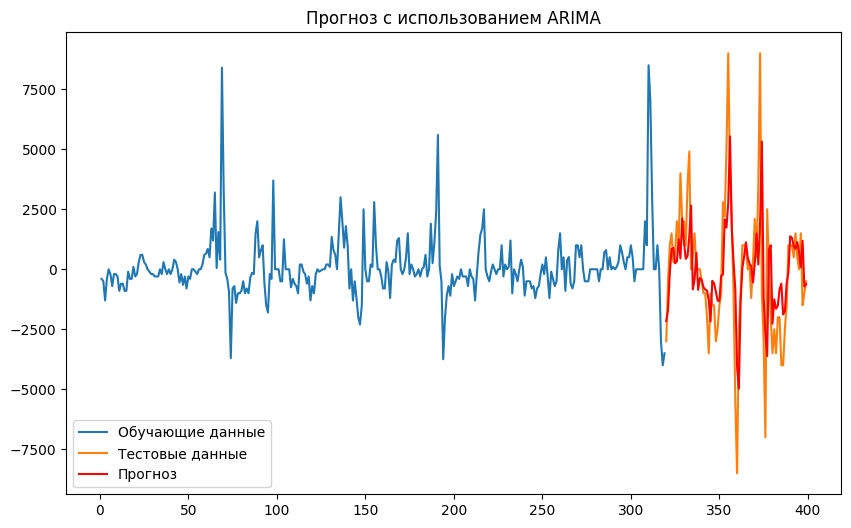

In [47]:
# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
forecast = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
plt.figure(figsize=(10, 6))
plt.plot(train, label='–û–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ')
plt.plot(test, label='–¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ')
plt.plot(forecast, label='–ü—Ä–æ–≥–Ω–æ–∑', color='red')
plt.legend()
plt.title('–ü—Ä–æ–≥–Ω–æ–∑ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º ARIMA')
plt.show()

### LSTM

In [53]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö (LSTM –ª—É—á—à–µ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_ts[['–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)']])
df_ts["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"] = scaler.fit_transform(df_ts[["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"]])

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã
train_size = int(len(df_ts) * 0.8)  # 80% –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ, 20% –Ω–∞ —Ç–µ—Å—Ç
train, test = df_ts.iloc[:train_size], df_ts.iloc[train_size:]


In [ ]:
# 4. –°–æ–∑–¥–∞–Ω–∏–µ –æ–∫–æ–Ω –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞
import numpy as np

def create_sequences(df_ts, seq_length):
    X, y = [], []
    for i in range(len(df_ts) - seq_length):
        X.append(df_ts.iloc[i:i+seq_length].values)  # –ò—Å–ø–æ–ª—å–∑—É–µ–º .iloc –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å DataFrame
        y.append(df_ts.iloc[i+seq_length].values)  # –î–æ—Å—Ç—É–ø –∫ —Å–ª–µ–¥—É—é—â–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é
    return np.array(X), np.array(y)

# –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä: –¥–ª–∏–Ω–∞ –æ–∫–Ω–∞ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –¥–Ω–µ–π, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è)
seq_length = 20

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ —Å—Ç–æ–ª–±–µ—Ü —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –≤ DataFrame
if "–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)" not in df_ts.columns:
    raise KeyError("–°—Ç–æ–ª–±–µ—Ü '–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)' –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ df_ts!")

# –í—ã–±–∏—Ä–∞–µ–º –Ω—É–∂–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –∏ –ø–µ—Ä–µ–¥–∞–µ–º –≤ —Ñ—É–Ω–∫—Ü–∏—é
X_train, y_train = create_sequences(df_ts[["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"]], seq_length)
X_test, y_test = create_sequences(df_ts[["–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É (—Å–≥–ª–∞–∂–µ–Ω–Ω–∞—è)"]], seq_length)

# –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ñ–æ—Ä–º—ã –¥–ª—è LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# 5. –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ LSTM-–º–æ–¥–µ–ª–∏

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model.compile(optimizer="adam", loss="mse")

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)


Epoch 1/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 33ms/step - loss: 0.0926 - val_loss: 0.0227
Epoch 2/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - loss: 0.0245 - val_loss: 0.0193
Epoch 3/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - loss: 0.0244 - val_loss: 0.0189
Epoch 4/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - loss: 0.0222 - val_loss: 0.0181
Epoch 5/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step - loss: 0.0213 - val_loss: 0.0177
Epoch 6/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 31ms/step - loss: 0.0172 - val_loss: 0.0166
Epoch 7/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 20ms/step - loss: 0.0182 - val_loss: 0.0161
Epoch 8/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 16ms/step - loss: 0.0155 - val_loss: 0.0156


12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step
MAE: 300.78
RMSE: 470.29
–û–±—â–∞—è –¥–ª–∏–Ω–∞ df_ts: 400
train_size: 320, seq_length: 20
–î–ª–∏–Ω–∞ df_ts –ø–æ—Å–ª–µ train_size + seq_length: 60
–†–∞–∑–º–µ—Ä y_test_inv: (380, 1)
–†–∞–∑–º–µ—Ä y_pred_inv: (380, 1)
–ü–æ—Å–ª–µ–¥–Ω–∏–µ 10 –¥–∞—Ç –≤ df_ts:
1970-01-01 00:00:00.000000390   2022-06-27
1970-01-01 00:00:00.000000391   2022-07-04
1970-01-01 00:00:00.000000392   2022-07-11
1970-01-01 00:00:00.000000393   2022-07-18
1970-01-01 00:00:00.000000394   2022-07-25
1970-01-01 00:00:00.000000395   2022-08-01
1970-01-01 00:00:00.000000396   2022-08-08
1970-01-01 00:00:00.000000397   2022-08-15
1970-01-01 00:00:00.000000398   2022-08-22
1970-01-01 00:00:00.000000399   2022-08-29
Name: dt, dtype: datetime64[ns]
–ü–µ—Ä–≤—ã–µ 10 –¥–∞—Ç —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞:
1970-01-01 00:00:00.000000340   2021-07-12
1970-01-01 00:00:00.000000341   2021-07-19
1970-01-01 00:00:00.000000342   2021-07-26
1970-01-01 00:00:00.

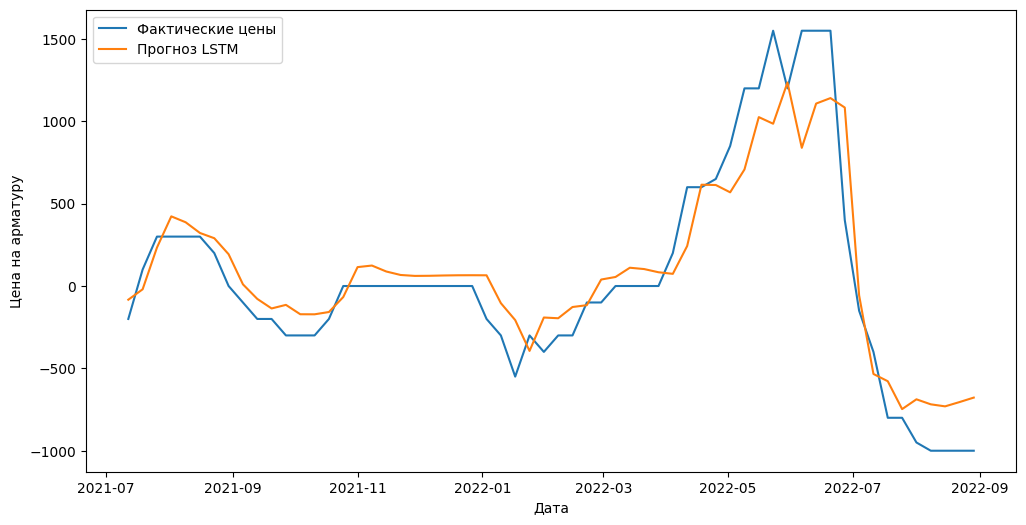

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏
y_pred = model.predict(X_test)

# –û–±—Ä–∞—Ç–Ω–æ–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# –û—Ü–µ–Ω–∫–∞ –æ—à–∏–±–æ–∫
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–æ–≤ –¥–∞–Ω–Ω—ã—Ö
print(f"–û–±—â–∞—è –¥–ª–∏–Ω–∞ df_ts: {len(df_ts)}")
print(f"train_size: {train_size}, seq_length: {seq_length}")
print(f"–î–ª–∏–Ω–∞ df_ts –ø–æ—Å–ª–µ train_size + seq_length: {len(df_ts.iloc[train_size + seq_length:])}")
print(f"–†–∞–∑–º–µ—Ä y_test_inv: {y_test_inv.shape}")
print(f"–†–∞–∑–º–µ—Ä y_pred_inv: {y_pred_inv.shape}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –∏–Ω–¥–µ–∫—Å—ã –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫
print("–ü–æ—Å–ª–µ–¥–Ω–∏–µ 10 –¥–∞—Ç –≤ df_ts:")
print(df_ts["dt"].tail(10))

print("–ü–µ—Ä–≤—ã–µ 10 –¥–∞—Ç —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞:")
print(df_ts["dt"].iloc[train_size + seq_length:train_size + seq_length + 10])

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–æ–≤ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∫ –æ–±—â–µ–º—É –º–∏–Ω–∏–º—É–º—É
min_length = min(len(df_ts["dt"].iloc[train_size + seq_length:]), len(y_test_inv))
dates = df_ts["dt"].iloc[train_size + seq_length:train_size + seq_length + min_length]
y_test_inv = y_test_inv[:min_length].flatten()
y_pred_inv = y_pred_inv[:min_length].flatten()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_inv, label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ —Ü–µ–Ω—ã")
plt.plot(dates, y_pred_inv, label="–ü—Ä–æ–≥–Ω–æ–∑ LSTM")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.legend()
plt.show()



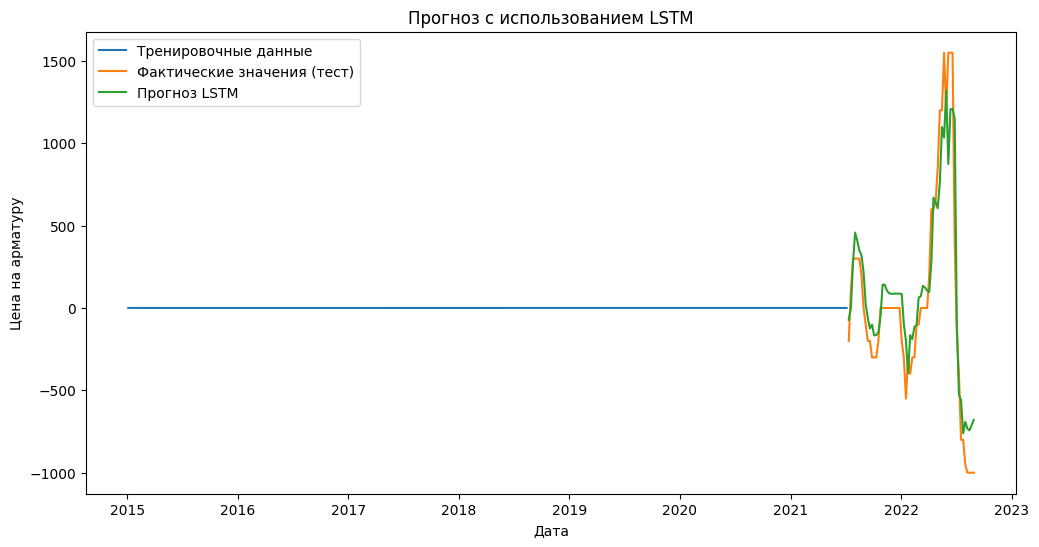

In [56]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
train_dates = df_ts['dt'][:train_size + seq_length]
test_dates = df_ts['dt'][train_size + seq_length:train_size + seq_length + len(y_test_inv)]

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –ø—Ä–æ–≥–Ω–æ–∑–∞
plt.figure(figsize=(12, 6))
plt.plot(train_dates, scaler.inverse_transform(scaled_data[:train_size + seq_length]), label="–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ")
plt.plot(test_dates, y_test_inv, label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (—Ç–µ—Å—Ç)")
plt.plot(test_dates, y_pred_inv, label="–ü—Ä–æ–≥–Ω–æ–∑ LSTM")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("–¶–µ–Ω–∞ –Ω–∞ –∞—Ä–º–∞—Ç—É—Ä—É")
plt.title("–ü—Ä–æ–≥–Ω–æ–∑ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º LSTM")
plt.legend()
plt.show()

### —Å–º–µ—Å—å 2 –º–æ–¥–µ–ª–π